In [1]:
# utilities
import re
import numpy as np
import pandas as pd

In [2]:
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
# nltk
from nltk.stem import WordNetLemmatizer

In [4]:
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
DATASET_COLUMNS = ["target","ids","date","flag","user","text"]
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv("training.1600000.processed.noemoticon.csv",encoding=DATASET_ENCODING, names = DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
892687,4,1691306833,Sun May 03 17:34:03 PDT 2009,NO_QUERY,iwasbirdmap,All clean
789378,0,2325368119,Thu Jun 25 05:18:55 PDT 2009,NO_QUERY,girlonthewall,my brother's sick...
111485,0,1825138858,Sun May 17 04:30:58 PDT 2009,NO_QUERY,dovella,WM 6.5 build 21232 for Omnia avaiable NOW htt...
1140504,4,1977053249,Sat May 30 19:58:49 PDT 2009,NO_QUERY,isweatbutter,"@kimlw no, those beverages are perfectly accep..."
327306,0,2009354150,Tue Jun 02 15:33:26 PDT 2009,NO_QUERY,hollietidball,i can't sleep AGAIN... exam at 9 dayum


In [6]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [8]:
len(df)

1600000

In [9]:
df.shape

(1600000, 6)

In [10]:
df.info

<bound method DataFrame.info of          target         ids                          date      flag  \
0             0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1             0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2             0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3             0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4             0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1599995       4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  
0        _TheSpecialOne_  @switchfoot

In [11]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [12]:
#checking for null values

In [13]:
np.sum(df.isnull().any(axis=1))

0

In [14]:
df["target"].unique()

array([0, 4], dtype=int64)

In [15]:
df["target"].nunique()#Count number of distinct elements in specified axis.

2

[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

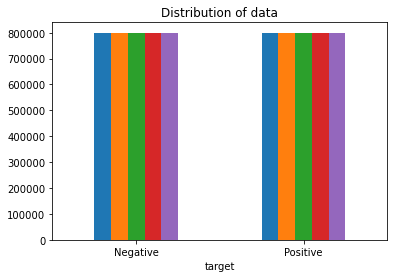

In [16]:
#Plotting the distribution for dataset
ax = df.groupby("target").count().plot(kind="bar",title="Distribution of data",legend=False)
ax.set_xticklabels(["Negative","Positive"],rotation=0)


In [17]:
#Storing data in lists
text,sentiment = list(df["text"]),list(df["target"])

In [18]:
import seaborn as sns

<AxesSubplot:xlabel='target', ylabel='count'>

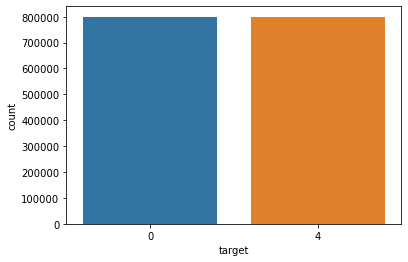

In [19]:
sns.countplot(x="target",data=df)

## Data Preprocessing

In [20]:
data = df[["text","target"]]

In [21]:
data["target"]= data["target"].replace(4,1) # replacing 4 with 1 to easy understanding on positive sentences

<ipython-input-21-cfdf43ec8b40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["target"]= data["target"].replace(4,1) # replacing 4 with 1 to easy understanding on positive sentences


In [22]:
data["target"][-5:-1]

1599995    1
1599996    1
1599997    1
1599998    1
Name: target, dtype: int64

In [23]:
data["target"].unique()

array([0, 1], dtype=int64)

In [24]:
#seperating positive and negatives

In [25]:
data_pos = data[data["target"]==1] 
data_neg = data[data["target"]==0]

In [26]:
#taking samples from data

In [27]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [28]:
#Combine positive and negative tweets

In [29]:
combined = pd.concat([data_pos,data_neg])

In [30]:
combined["text"] = combined["text"].str.lower()
combined["text"].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

In [31]:
type(combined)

pandas.core.frame.DataFrame

In [32]:
#defining set containing all stopwords in English

In [33]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\efe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
print(stopwords.words("English"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [35]:
print(stopwords.words("Turkish"))

['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani']


In [36]:
stopwordlist = stopwords.words("English")

In [37]:
stopwordlist

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
type(stopwordlist)

list

In [39]:
#Cleaning and removing the above stop words list from the tweet text

In [40]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
combined["text"] = combined["text"].apply(lambda text: cleaning_stopwords(text))
combined["text"].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [41]:
#Cleaning and removing punctuations

In [42]:
import string 
english_punctuations = string.punctuation

print(english_punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [43]:
combined["text"].tail()

19995    much time weekend, work trip malmï¿½ fri-sat t...
19996                                     one day holidays
19997                   feeling right .. hate damn humprey
19998    geez,i hv read whole book personality types em...
19999     threw sign donnie bent get thingee made sad face
Name: text, dtype: object

In [44]:
punctuation_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans(" ", " ", punctuation_list)
    return text.translate(translator)
combined["text"]= combined["text"].apply(lambda x: cleaning_punctuations(x))
combined["text"].tail()
    

19995    much time weekend work trip malmï¿½ frisat tod...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999     threw sign donnie bent get thingee made sad face
Name: text, dtype: object

Note:Python String maketrans() function is used to construct the transition table i.e specify the list of characters that need to be replaced in the whole string or the characters that need to be deleted from the string.

Syntax:

maketrans(str1, str2, str3)

Parameters:

str1: Specifies the list of characters that need to be replaced.
str2: Specifies the list of characters with which the characters need to be replaced.
str3: Specifies the list of characters that need to be deleted.
Returns: 

Returns the translation table which specifies the conversions that can be used by translate()

In [45]:
#Cleaning and removing repeating characters 

In [46]:
def cleaning_repeating_char(text):
    return re.sub(r"(.)1+",r"1",text)
combined["text"] = combined["text"].apply(lambda x: cleaning_repeating_char(x))
combined["text"].tail()

19995    much time weekend work trip malmï¿½ frisat tod...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999     threw sign donnie bent get thingee made sad face
Name: text, dtype: object

Note:
    The re.sub() function stands for a substring and returns a string with replaced values. Multiple elements can be replaced using a list when we use this function.
    
    Parameters
The first parameter, pattern, denotes the string/pattern that needs to be replaced.

The second parameter, repl, denotes the string/pattern with which the pattern is replaced.

The third parameter, string, denotes the string on which the re.sub() operation will be executed.

The fourth parameter, count, denotes the number of replacements that should occur.

The fifth parameter, flags, serves to modify the behavior of the regular expression operation.

In [47]:
#Cleaning and removing URLs

In [48]:
def cleaning_URLs(data):
    return re.sub("((www.[^s]+)|(https:?://[^s]+))"," ",data )
combined["text"] = combined["text"].apply(lambda x: cleaning_URLs(x))
combined["text"].tail()

19995    much time weekend work trip malmï¿½ frisat tod...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999     threw sign donnie bent get thingee made sad face
Name: text, dtype: object

In [49]:
#Cleaning and removing numeric numbers

In [50]:
def cleaning_numbers(data):
    return re.sub("[0-9]","",data)
combined["text"] = combined["text"].apply(lambda x: cleaning_numbers(x))


In [51]:
#Getting tokenization of tweet text

In [52]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')
combined['text'] = combined['text'].apply(tokenizer.tokenize)
combined['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [53]:
combined["text"][:50]

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
800005    [productoffear, tell, burst, laughing, really,...
800006    [rkeithhill, thans, response, ihad, already, f...
800007    [keepinupwkris, jealous, hope, great, time, ve...
800008    [tommcfly, ah, congrats, mr, fletcher, finally...
800009    [evoip, responded, stupid, cat, helping, type,...
800010    [crazy, day, school, hours, straiiight, watch,...
800011    [naughtyhaughty, forget, two, half, men, love,...
800012        [nileyjileyluver, haha, worry, get, hang, it]
800013    [soundwav, least, one, feeling, lost, may, cau...
800014    [lutheranlucciol, make, sure, dm, post, link, ...
800015                        [added, tweetie, new, iphone]
800016    [michellardi, really, know, th

In [54]:
#Applying stemming

In [55]:
stemmer = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [stemmer.stem(word) for word in data]
    return text
combined["text"]= combined["text"].apply(lambda x: stemming_on_text(x))
combined["text"][:50]

800000               [love, healthuandpet, u, guy, r, best]
800001    [im, meet, one, besti, tonight, cant, wait, gi...
800002    [darealsunisakim, thank, twitter, add, sunisa,...
800003    [sick, realli, cheap, hurt, much, eat, real, f...
800004                     [lovesbrooklyn, effect, everyon]
800005    [productoffear, tell, burst, laugh, realli, lo...
800006    [rkeithhil, than, respons, ihad, alreadi, find...
800007    [keepinupwkri, jealou, hope, great, time, vega...
800008    [tommcfli, ah, congrat, mr, fletcher, final, j...
800009    [evoip, respond, stupid, cat, help, type, forg...
800010    [crazi, day, school, hour, straiiight, watch, ...
800011    [naughtyhaughti, forget, two, half, men, love,...
800012          [nileyjileyluv, haha, worri, get, hang, it]
800013    [soundwav, least, one, feel, lost, may, caus, ...
800014    [lutheranlucciol, make, sure, dm, post, link, ...
800015                             [ad, tweeti, new, iphon]
800016    [michellardi, realli, know, th

In [56]:
nltk.download("wordnet")
lemma = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lemma.lemmatize(word) for word in data]
    return text
combined["text"]=combined["text"].apply(lambda x: lemmatizer_on_text(x))
combined["text"][:50]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\efe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


800000               [love, healthuandpet, u, guy, r, best]
800001    [im, meet, one, besti, tonight, cant, wait, gi...
800002    [darealsunisakim, thank, twitter, add, sunisa,...
800003    [sick, realli, cheap, hurt, much, eat, real, f...
800004                     [lovesbrooklyn, effect, everyon]
800005    [productoffear, tell, burst, laugh, realli, lo...
800006    [rkeithhil, than, respons, ihad, alreadi, find...
800007    [keepinupwkri, jealou, hope, great, time, vega...
800008    [tommcfli, ah, congrat, mr, fletcher, final, j...
800009    [evoip, respond, stupid, cat, help, type, forg...
800010    [crazi, day, school, hour, straiiight, watch, ...
800011    [naughtyhaughti, forget, two, half, men, love,...
800012          [nileyjileyluv, haha, worri, get, hang, it]
800013    [soundwav, least, one, feel, lost, may, caus, ...
800014    [lutheranlucciol, make, sure, dm, post, link, ...
800015                             [ad, tweeti, new, iphon]
800016    [michellardi, realli, know, th

In [57]:
combined[:-10]

,text,target
800000,"[love, healthuandpet, u, guy, r, best]",1
800001,"[im, meet, one, besti, tonight, cant, wait, gi...",1
800002,"[darealsunisakim, thank, twitter, add, sunisa,...",1
800003,"[sick, realli, cheap, hurt, much, eat, real, f...",1
800004,"[lovesbrooklyn, effect, everyon]",1
...,...,...
19985,"[sadli, babymak, song, preview, day, like, rig...",0
19986,"[still, bleak, iphon, which, total, love]",0
19987,"[want, upload, photo, twitter, let, me, say, m...",0
19988,"[lynn, soon, get, prom, ring, yay, drama, rehe...",0


In [58]:
data[:10]

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
5,@Kwesidei not the whole crew,0
6,Need a hug,0
7,@LOLTrish hey long time no see! Yes.. Rains a...,0
8,@Tatiana_K nope they didn't have it,0
9,@twittera que me muera ?,0


In [59]:
#Plot a cloud of words for negative tweets

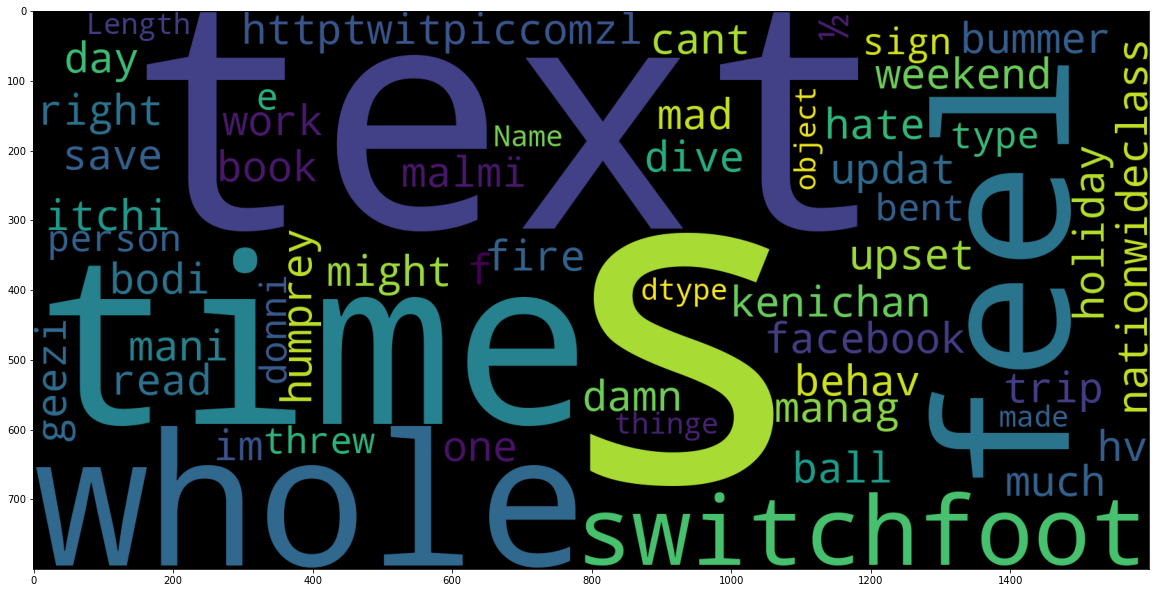

In [60]:
data_neg= str(combined["text"][20000:])
plt.figure(figsize=(20,20))
cloud = WordCloud(max_words=1000,width=1600,height=800, collocations=False).generate(str(data_neg))
plt.imshow(cloud)

In [61]:
#Plot a cloud of positive words

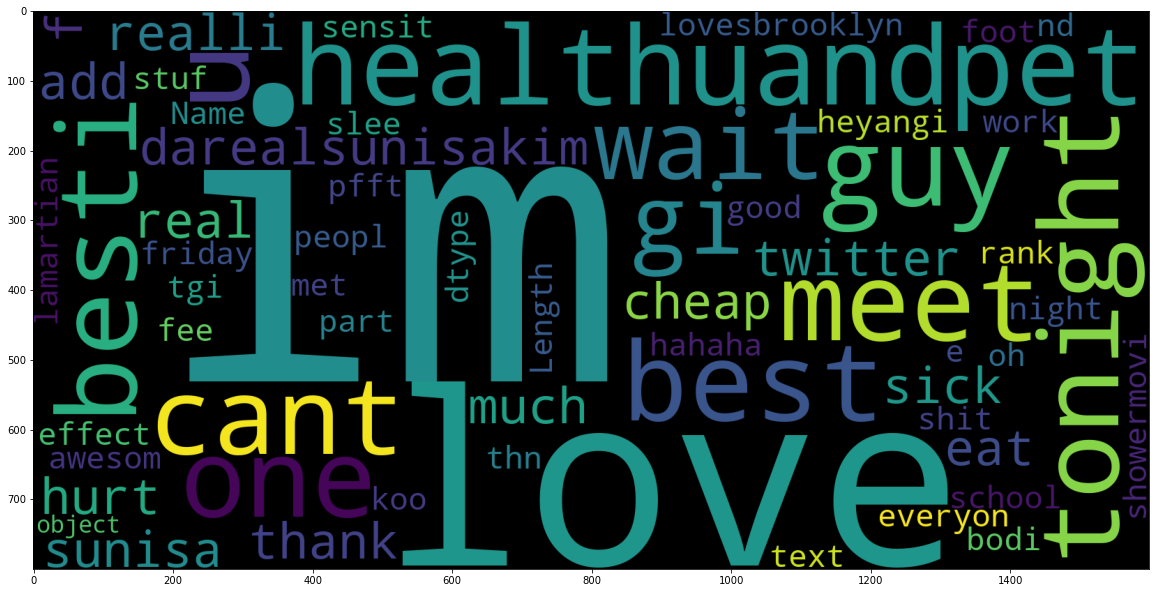

In [62]:
data_pos=combined["text"][:20000]
cloud= WordCloud(max_words=1000, width=1600, height=800,collocations=False).generate(str(data_pos))
plt.figure(figsize=(20,20))
plt.imshow(cloud)

In [63]:
#Seperating input feature and label

In [64]:
X = data.text
y = data.target

## Splitting data into Train and Test sets

In [65]:
#Seperating the 80% data for training and %20 for testing data

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1000000)

## Transforming the Dataset Using TF-IDF Vectorizer

In [67]:
vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=500000)
vectorizer.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [68]:
print("Number of feature words:",len(vectorizer.get_feature_names()))

Number of feature words: 500000


In [69]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [70]:
X_train[:10]

<10x500000 sparse matrix of type '<class 'numpy.float64'>'
	with 249 stored elements in Compressed Sparse Row format>

## Model Evaluation

* Accuracy Score
* Confusion Matrix
* ROC-AUC 

In [71]:
def model_Evaluate(model):
    
    #Predict the values for test dataset
    y_pred= model.predict(X_test)
    print(classification_report(y_test,y_pred))
    
    #Compute and plot confusion matrix
    cf_matrix = confusion_matrix(y_test,y_pred)
    categories = ["Negative","Positive"]
    group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels=[f"{v1}n{v2}" for v1,v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(cf_matrix,annot=labels,cmap="Blues",fmt="",xticklabels=categories,yticklabels=categories)
    plt.xlabel("Predicted Values",fontdict={"size":14},labelpad=10)
    plt.ylabel("Actual Values",fontdict={"size":14},labelpad=10)
    plt.title("Confusion Matrix",fontdict={"size":18},pad=20)


In [72]:
num = 15
"{:0.2%}".format(num)

'1500.00%'

In [73]:
num = 15
"{0:.2%}".format(num)

'1500.00%'

In [74]:
num = 15
"{0:0.2%}".format(num)

'1500.00%'

In [75]:
text = "I have {num:.2f} TL"
print(text.format(num=4))

I have 4.00 TL


## Model Building

### Model1

              precision    recall  f1-score   support

           0       0.80      0.79      0.80    159981
           1       0.80      0.81      0.80    160019

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



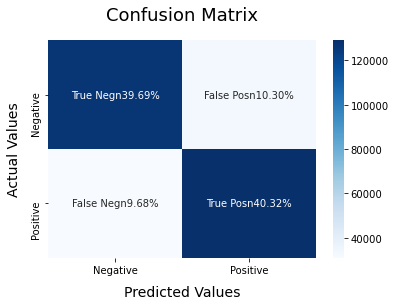

In [76]:
BNBmodel=BernoulliNB()
BNBmodel.fit(X_train,y_train)
model_Evaluate(BNBmodel)
y_pred1=BNBmodel.predict(X_test)

In [77]:
#Plot ROC-AUC for 

In [78]:
from sklearn.metrics import roc_curve,auc
def ROC_AUC(y_test,y_pred):
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)
    roc_auc=auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr,tpr,color="blue",lw=1,label='ROC curve(area=%0.2f)' % roc_auc )
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

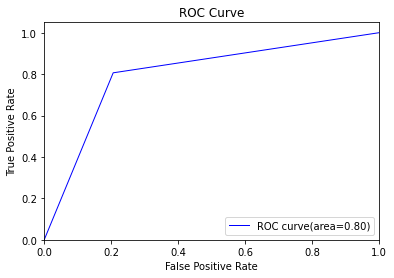

In [79]:
ROC_AUC(y_test,y_pred1)

## Model2

              precision    recall  f1-score   support

           0       0.82      0.81      0.81    159981
           1       0.81      0.82      0.82    160019

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



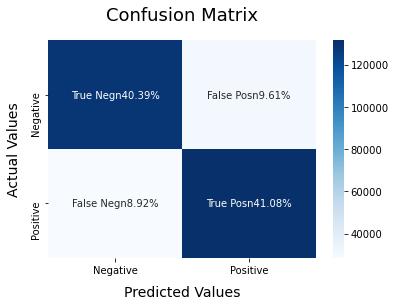

In [80]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train,y_train)
model_Evaluate(SVCmodel)
y_pred2=SVCmodel.predict(X_test)

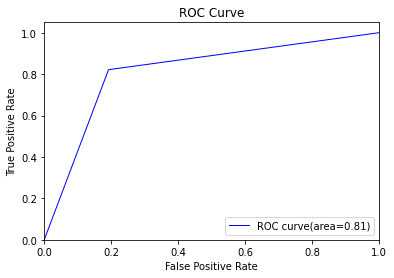

In [81]:
ROC_AUC(y_test,y_pred2)

## Model3

              precision    recall  f1-score   support

           0       0.83      0.82      0.82    159981
           1       0.82      0.83      0.83    160019

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000



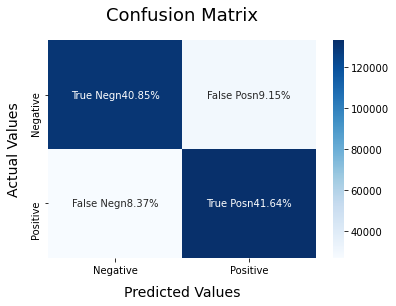

In [82]:
LRmodel = LogisticRegression(C=2,max_iter=1000,n_jobs=-1)# -1 means use all processors
LRmodel.fit(X_train,y_train)
model_Evaluate(LRmodel)
y_pred3=LRmodel.predict(X_test)

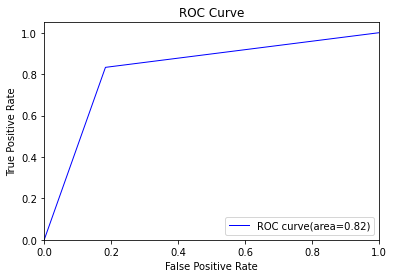

In [83]:
ROC_AUC(y_test,y_pred3)